In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv('dataset/Traffic_Crashes_cleaned.csv')

In [3]:
data

,CRASH_RECORD_ID,POSTED_SPEED_LIMIT,TRAFFIC_CONTROL_DEVICE,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,TRAFFICWAY_TYPE,ALIGNMENT,ROADWAY_SURFACE_COND,...,BEAT_OF_OCCURRENCE,NUM_UNITS,MOST_SEVERE_INJURY,INJURIES_TOTAL,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,LATITUDE,LONGITUDE,YEAR
0,0,under 30,NO/UNKNOWN/OTHER,FUNCTIONING,CLEAR_CLOUDY,DAYLIGHT,Rear End,OTHER_OR_UNKOWN_TRAFFICWAY,STRAIGHT,DRY,...,1654.0,2,NONINCAPACITATING INJURY,1,12-17,Friday,August,NaN,NaN,2023
1,1,over 30,ACTIVE SIGNAL CONTROL,FUNCTIONING,CLEAR_CLOUDY,DAYLIGHT,Parked Vehicle,MAIN_ROADWAY_FLOW,STRAIGHT,DRY,...,1235.0,3-5,NO INDICATION OF INJURY,0,12-17,Saturday,July,41.854120,-87.665902,2023
2,2,over 30,NO/UNKNOWN/OTHER,UNKNOWN OR MISSING,CLEAR_CLOUDY,DAYLIGHT,Vulnerable User,MAIN_ROADWAY_FLOW,STRAIGHT,DRY,...,1633.0,2,NONINCAPACITATING INJURY,1,12-17,Friday,August,41.942976,-87.761883,2023
3,3,under 30,NO/UNKNOWN/OTHER,UNKNOWN OR MISSING,CLEAR_CLOUDY,DAYLIGHT,Vulnerable User,ONE_WAY_STREET,CURVE,DRY,...,1655.0,2,FATAL,1,6-11,Tuesday,November,NaN,NaN,2019
4,4,under 30,NO/UNKNOWN/OTHER,UNKNOWN OR MISSING,CLEAR_CLOUDY,DAYLIGHT,Fixed/Other Object,OTHER_OR_UNKOWN_TRAFFICWAY,STRAIGHT,DRY,...,1653.0,1,NO INDICATION OF INJURY,0,6-11,Friday,August,NaN,NaN,2023
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
932395,932395,over 30,ACTIVE SIGNAL CONTROL,FUNCTIONING,CLEAR_CLOUDY,DAYLIGHT,Rear End,MAIN_ROADWAY_FLOW,STRAIGHT,DRY,...,1732.0,2,NO INDICATION OF INJURY,0,6-11,Friday,November,41.953655,-87.718926,2019
932396,932396,over 30,NO/UNKNOWN/OTHER,UNKNOWN OR MISSING,CLEAR_CLOUDY,DAYLIGHT,Sideswipe,MAIN_ROADWAY_FLOW,STRAIGHT,DRY,...,613.0,2,NO INDICATION OF INJURY,0,12-17,Monday,June,41.746905,-87.644077,2023
932397,932397,over 30,NO/UNKNOWN/OTHER,FUNCTIONING,CLEAR_CLOUDY,"DARKNESS, LIGHTED ROAD",Fixed/Other Object,ONE_WAY_STREET,STRAIGHT,DRY,...,1124.0,1,NO INDICATION OF INJURY,0,18-23,Friday,November,41.876044,-87.700459,2021
932398,932398,over 30,NO/UNKNOWN/OTHER,UNKNOWN OR MISSING,PRECIPITATION,DAYLIGHT,Parked Vehicle,MAIN_ROADWAY_FLOW,STRAIGHT,WET_OR_DIRTY,...,823.0,2,NO INDICATION OF INJURY,0,12-17,Thursday,March,41.775367,-87.707177,2020


### Conversione colonne pre-analisi

In [35]:
colonne_categoriche=['POSTED_SPEED_LIMIT','TRAFFIC_CONTROL_DEVICE','DEVICE_CONDITION','WEATHER_CONDITION','LIGHTING_CONDITION','FIRST_CRASH_TYPE','TRAFFICWAY_TYPE','ALIGNMENT','ROADWAY_SURFACE_COND','ROAD_DEFECT','REPORT_TYPE','CRASH_TYPE','DAMAGE','STREET_DIRECTION','NUM_UNITS','MOST_SEVERE_INJURY','CRASH_HOUR','CRASH_DAY_OF_WEEK','CRASH_MONTH','PRIM_CONTRIBUTORY_CAUSE','INJURIES_TOTAL','YEAR']

data[colonne_categoriche]=data[colonne_categoriche].astype('category')

colonne_stringa=['CRASH_RECORD_ID','DATE_POLICE_NOTIFIED','STREET_NO','STREET_NAME','BEAT_OF_OCCURRENCE','LATITUDE','LONGITUDE']

data[colonne_stringa]=data[colonne_stringa].astype('object')

### Analisi esplorativa

In [36]:
print(f"Dimensioni dataset: {data.shape}")
print("\nInfo sul dataset:")
data.info()
print("\nStatistiche descrittive:")
data.describe(include='all')

Dimensioni dataset: (932400, 29)

Info sul dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 932400 entries, 0 to 932399
Data columns (total 29 columns):
 #   Column                   Non-Null Count   Dtype   
---  ------                   --------------   -----   
 0   CRASH_RECORD_ID          932400 non-null  object  
 1   POSTED_SPEED_LIMIT       932400 non-null  category
 2   TRAFFIC_CONTROL_DEVICE   932400 non-null  category
 3   DEVICE_CONDITION         932400 non-null  category
 4   WEATHER_CONDITION        932400 non-null  category
 5   LIGHTING_CONDITION       932400 non-null  category
 6   FIRST_CRASH_TYPE         931841 non-null  category
 7   TRAFFICWAY_TYPE          932400 non-null  category
 8   ALIGNMENT                932400 non-null  category
 9   ROADWAY_SURFACE_COND     932400 non-null  category
 10  ROAD_DEFECT              932400 non-null  category
 11  REPORT_TYPE              902766 non-null  category
 12  CRASH_TYPE               932400 non-null  catego

,CRASH_RECORD_ID,POSTED_SPEED_LIMIT,TRAFFIC_CONTROL_DEVICE,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,TRAFFICWAY_TYPE,ALIGNMENT,ROADWAY_SURFACE_COND,...,BEAT_OF_OCCURRENCE,NUM_UNITS,MOST_SEVERE_INJURY,INJURIES_TOTAL,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,LATITUDE,LONGITUDE,YEAR
count,932400,932400,932400,932400,932400,932400,931841,932400,932400,932400,...,932395.0,932400,930352,930366,932400,932400,932400,925527.000000,925527.000000,932400
unique,932400,2,6,3,4,6,6,8,2,5,...,276.0,4,5,3,4,7,12,326676.000000,326676.000000,13
top,0,over 30,NO/UNKNOWN/OTHER,UNKNOWN OR MISSING,CLEAR_CLOUDY,DAYLIGHT,Frontal/Turning,MAIN_ROADWAY_FLOW,STRAIGHT,DRY,...,1834.0,2,NO INDICATION OF INJURY,0,12-17,Friday,October,41.976201,-87.905309,2018
freq,1,764837,573723,607136,758295,596285,243911,600813,924093,686045,...,11219.0,816550,798882,798896,385864,151503,86691,1487.000000,1487.000000,118950


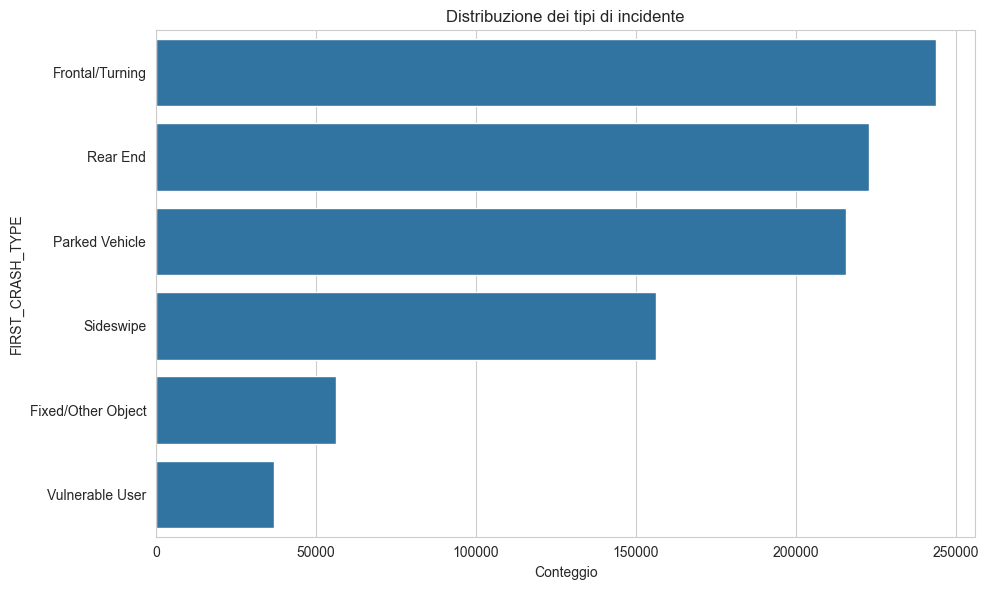

In [37]:
plt.figure(figsize=(10, 6))
order = data['FIRST_CRASH_TYPE'].value_counts().index
sns.countplot(data=data, y='FIRST_CRASH_TYPE', order=order)
plt.title('Distribuzione dei tipi di incidente')
plt.xlabel('Conteggio')
plt.tight_layout()
plt.show()

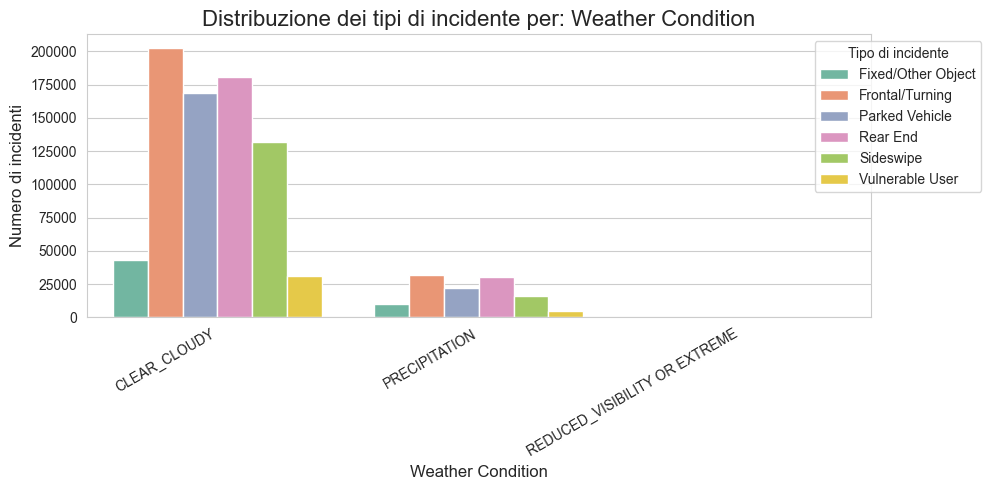

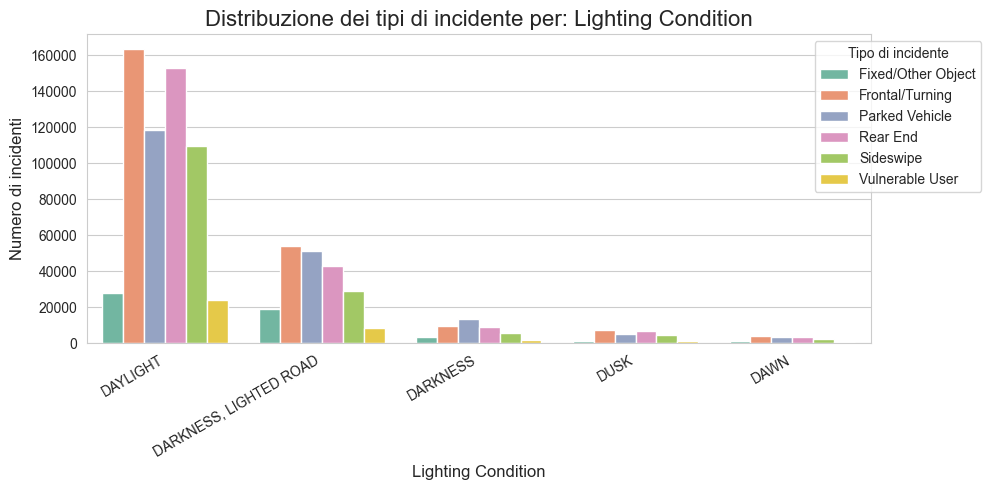

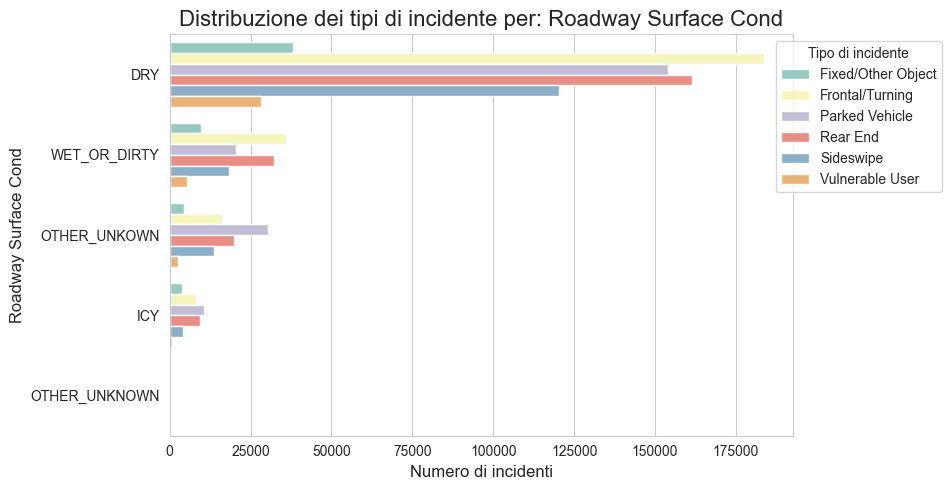

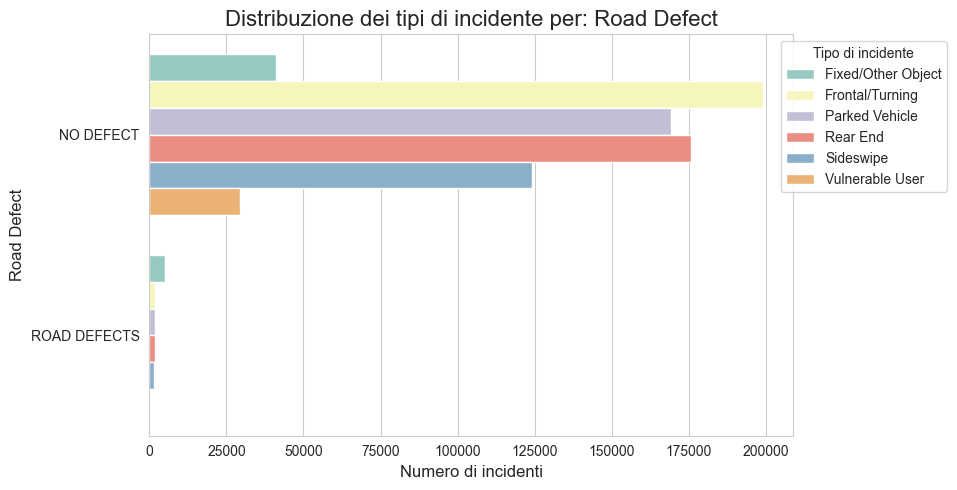

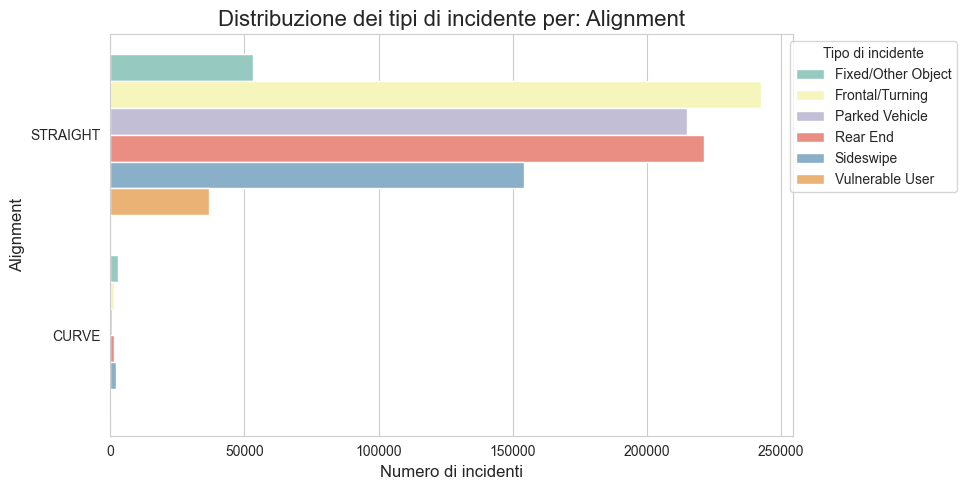

In [38]:
sns.set_style("whitegrid")

## RELAZIONE TRA FIRST_CRASH_TYPE E CONDIZIONI ATMOSFERICHE E DI LUCE 

env_conditions = ['WEATHER_CONDITION', 'LIGHTING_CONDITION']

df_env = data[['FIRST_CRASH_TYPE'] + env_conditions].melt(
    id_vars='FIRST_CRASH_TYPE',
    var_name='Condition_Type',
    value_name='Condition'
)

df_env = df_env[df_env['Condition'].notnull() & (df_env['Condition'] != 'UNKNOWN')]

for condition_type in env_conditions:
    subset = df_env[df_env['Condition_Type'] == condition_type]

    plt.figure(figsize=(10, 5))
    sns.countplot(
        data=subset,
        x='Condition',
        hue='FIRST_CRASH_TYPE',
        order=subset['Condition'].value_counts().index,
        palette='Set2'
    )
    plt.title(f'Distribuzione dei tipi di incidente per: {condition_type.replace("_", " ").title()}', fontsize=16)
    plt.xlabel(condition_type.replace('_', ' ').title(), fontsize=12)
    plt.ylabel("Numero di incidenti", fontsize=12)
    plt.xticks(rotation=30, ha='right', fontsize=10)
    plt.legend(title="Tipo di incidente", loc='upper right', bbox_to_anchor=(1.15, 1))
    plt.tight_layout()
    plt.show()


# --- GRAFICI PER CONDIZIONI DELLA STRADA,DIFETTI NELLA STRADA,TIPOLOGIA DI STRADA (RETTILINEO O CURVA) ---

road_conditions = ['ROADWAY_SURFACE_COND', 'ROAD_DEFECT', 'ALIGNMENT']

df_road = data[['FIRST_CRASH_TYPE'] + road_conditions].melt(
    id_vars='FIRST_CRASH_TYPE',
    var_name='Road_Condition',
    value_name='Condition'
)

df_road = df_road[df_road['Condition'].notnull() & (df_road['Condition'] != "UNKNOWN")]

for condition_type in road_conditions:
    subset = df_road[df_road['Road_Condition'] == condition_type]

    plt.figure(figsize=(10, 5))
    sns.countplot(
        data=subset,
        y='Condition',
        hue='FIRST_CRASH_TYPE',
        order=subset['Condition'].value_counts().index,
        palette='Set3'
    )
    plt.title(f'Distribuzione dei tipi di incidente per: {condition_type.replace("_", " ").title()}', fontsize=16)
    plt.xlabel("Numero di incidenti", fontsize=12)
    plt.ylabel(condition_type.replace('_', ' ').title(), fontsize=12)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    plt.legend(title="Tipo di incidente", loc='upper right', bbox_to_anchor=(1.25, 1))
    plt.tight_layout()
    plt.show()



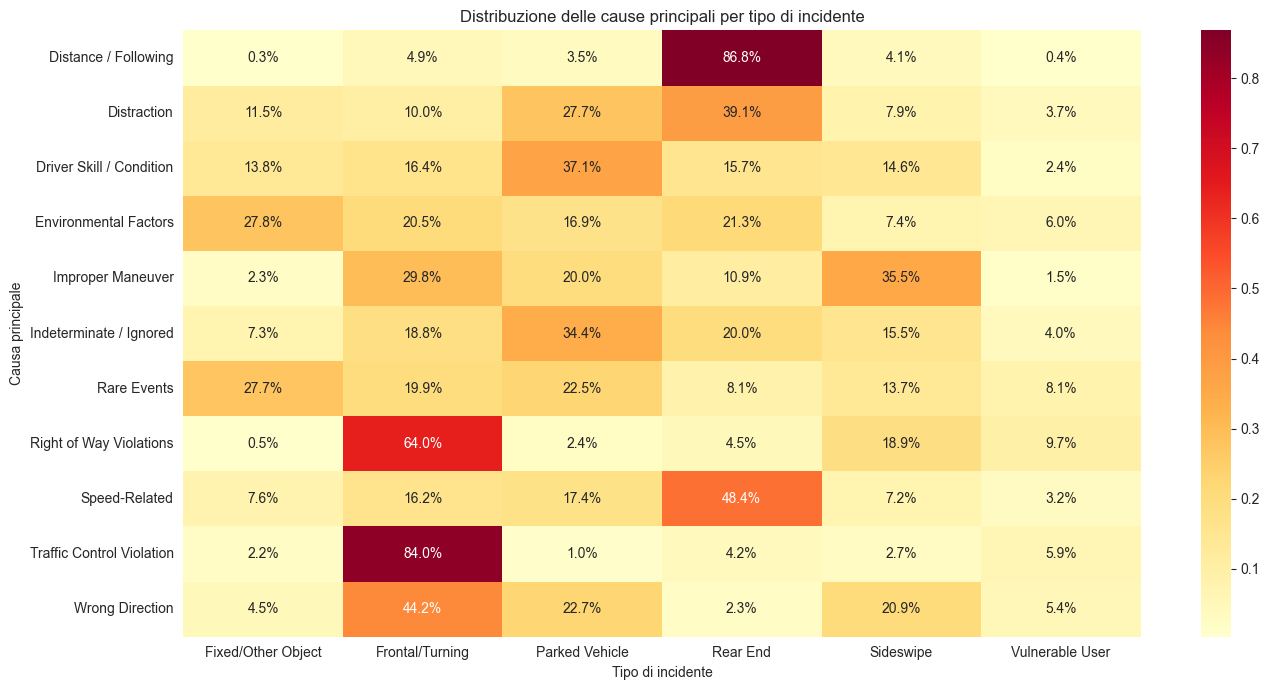

In [23]:
# HEATMAP SULLA DISTRIBUZIONE DELLE CAUSE PRINCIPALI PER TIPO DI INCIDENTE
plt.figure(figsize=(14, 7))
cross_tab = pd.crosstab(data['PRIM_CONTRIBUTORY_CAUSE'], data['FIRST_CRASH_TYPE'])
cross_tab = cross_tab.div(cross_tab.sum(1), axis=0) 
sns.heatmap(cross_tab, cmap='YlOrRd', annot=True, fmt='.1%')
plt.title('Distribuzione delle cause principali per tipo di incidente')
plt.ylabel('Causa principale')
plt.xlabel('Tipo di incidente')
plt.tight_layout()
plt.show()

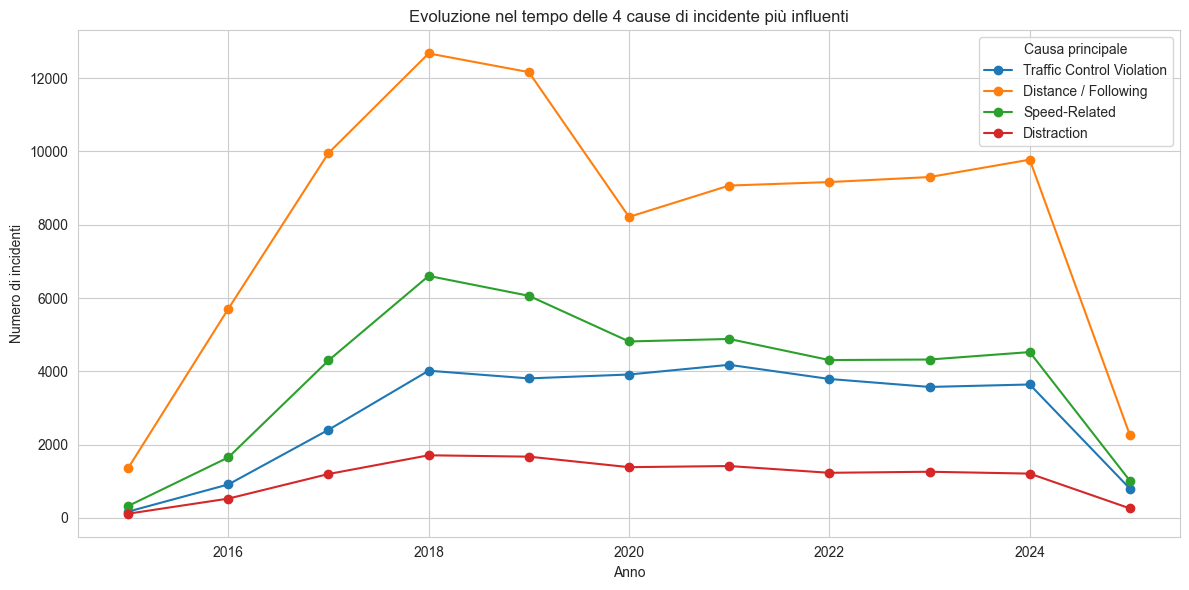

In [24]:
# GRAFICO DELLE CAUSE PIù INFLUENTI DI INCIDENTE PER ANNO
cause_top4= [
    "Traffic Control Violation",
    "Distance / Following",
    "Speed-Related",
    "Distraction"
    
]

data_filtered = data[data["PRIM_CONTRIBUTORY_CAUSE"].isin(cause_top4)]

data_grouped = (
    data_filtered.groupby(["YEAR", "PRIM_CONTRIBUTORY_CAUSE"])
    .size()
    .reset_index(name="incident_count")
)


pivot_df = data_grouped.pivot(index="YEAR", columns="PRIM_CONTRIBUTORY_CAUSE", values="incident_count").fillna(0)


plt.figure(figsize=(12, 6))
for cause in cause_top4:
    plt.plot(pivot_df.index, pivot_df[cause], label=cause, marker="o")

plt.title("Evoluzione nel tempo delle 4 cause di incidente più influenti")
plt.xlabel("Anno")
plt.ylabel("Numero di incidenti")
plt.legend(title="Causa principale")
plt.grid(True)
plt.tight_layout()
plt.show()
